# Matplotlib vs. Seaborn
- Seaborn is built on top of Matplotlib
- Additional plot types
- Improves default styles
- Easier to create complicated plots

In [112]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [113]:
df = pd.read_csv("pokemon_new.csv", index_col=0)
df.head()

,Name,Type 1,Type1_Cat,Type1_catb,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
ID,,,,,,,,,,,,,,
147,Dratini,Dragon,Animal,Other,NaN,300,41,64,45,50,50,50,1,False
148,Dragonair,Dragon,Animal,Other,NaN,420,61,84,65,70,70,70,2,False
149,Dragonite,Dragon,Animal,Other,Flying,600,91,134,95,100,100,80,3,False
4,Charmander,Fire,Element,Element,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,Element,Element,NaN,405,58,64,58,80,65,80,2,False


In [114]:
type1_group = df.groupby(['Type 1','Stage']).sum()
type1_group.to_csv ('pokemon_type1.csv')
type1_group.head()

Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Legendary
Type 1 Stage                                                                 
Bug    1       1980  315     425      350      235      300    355      False
       2       1265  225     205      245      200      205    185      False
       3        790  125     135       90      135      160    145      False
Dragon 1        300   41      64       45       50       50     50      False
       2        420   61      84       65       70       70     70      False

In [115]:
list(type1_group)

['Total',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Legendary']

In [116]:
type1_grp = df.groupby(['Type 1','Stage'], as_index=False).mean()
list(type1_grp)

['Type 1',
 'Stage',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Legendary']

In [117]:
type1 = df.loc[df['Type 1'].isin(['Electric','Fire','Ice','Water'])]

# Annotated Heatmap

In [118]:
type1_pivot = type1_grp.pivot(index="Type 1", columns="Stage", values="Defense")

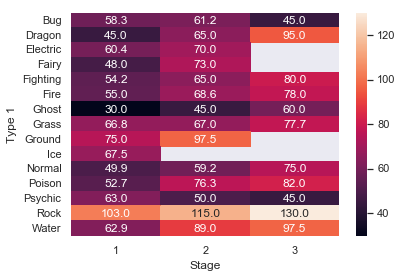

In [119]:
ax = sns.heatmap(type1_pivot, annot=True, fmt='.1f')

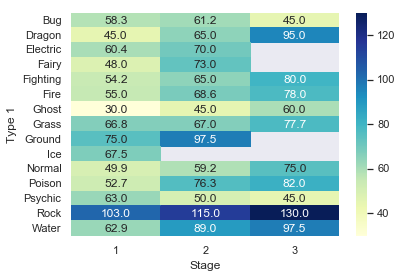

In [120]:
ax = sns.heatmap(type1_pivot, annot=True, fmt='.1f',cmap="YlGnBu")

# PairGrid

In [121]:
type1_overall = df.groupby(['Type 1'], as_index=False).mean()

In [122]:
type1_grp=type1_grp[['HP', 'Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def', 'Stage', 'Type 1','Total']]
type1_overall = type1_grp[type1_grp['Stage'] == 1]
type1_overall

,HP,Attack,Defense,Speed,Sp. Atk,Sp. Def,Stage,Type 1,Total
0,52.500000,70.833333,58.333333,59.166667,39.166667,50.000000,1,Bug,330.000000
3,41.000000,64.000000,45.000000,50.000000,50.000000,50.000000,1,Dragon,300.000000
6,51.000000,58.600000,60.400000,88.000000,84.000000,67.000000,1,Electric,409.000000
8,70.000000,45.000000,48.000000,35.000000,60.000000,65.000000,1,Fairy,323.000000
10,52.500000,96.250000,54.250000,67.000000,35.000000,75.000000,1,Fighting,380.000000
13,56.166667,73.833333,55.000000,77.166667,78.333333,66.666667,1,Fire,407.166667
16,30.000000,35.000000,30.000000,80.000000,100.000000,35.000000,1,Ghost,310.000000
19,53.000000,53.800000,66.800000,43.000000,74.000000,49.000000,1,Grass,339.600000
22,47.500000,66.250000,75.000000,48.750000,31.250000,38.750000,1,Ground,307.500000
24,77.500000,67.500000,67.500000,90.000000,105.000000,110.000000,1,Ice,517.500000


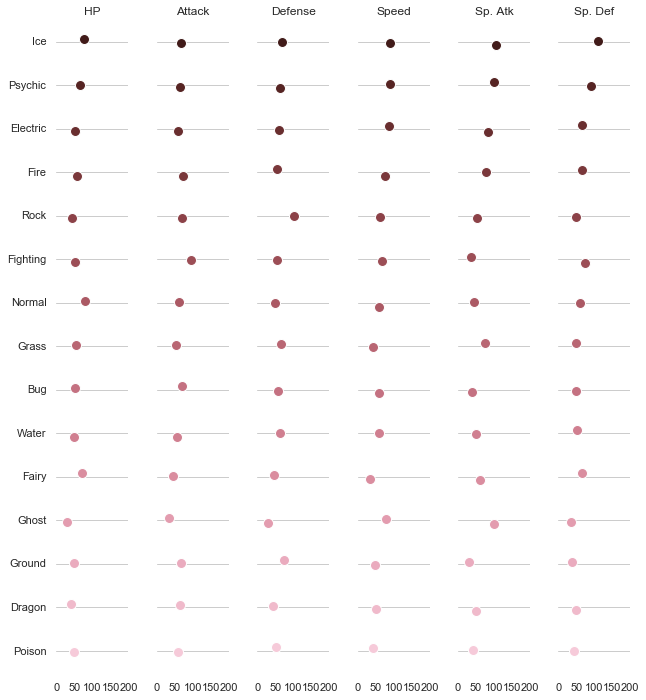

In [123]:
sns.set(style="whitegrid")

# Make the PairGrid
g = sns.PairGrid(type1_overall.sort_values("Total", ascending=False),
                 x_vars=type1_overall.columns[:-3], y_vars=["Type 1"],
                 height=10, aspect=.15)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="ch:s=1,r=-.1,h=1_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0,200),xlabel="", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["HP", "Attack", "Defense", "Speed", "Sp. Atk", "Sp. Def"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

# KDE Plot

Text(3.8,4.5,'Fire')

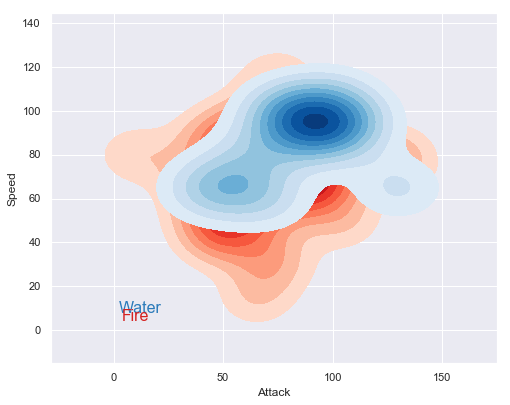

In [124]:
sns.set(style="darkgrid")
iris = sns.load_dataset("iris")

# Subset the pokemon dataset by species
water= df.loc[df['Type 1'].isin(['Water'])]
fire= df.loc[df['Type 1'].isin(['Fire'])]

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(water.Attack, water.Speed,
                cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(fire.Attack, fire.Speed,
                cmap="Blues", shade=True, shade_lowest=False)


# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "Water", size=16, color=blue)
ax.text(3.8, 4.5, "Fire", size=16, color=red)

# Bar plots

In [125]:
type1_stage = type1.loc[type1['Stage'].isin(['1','2'])]

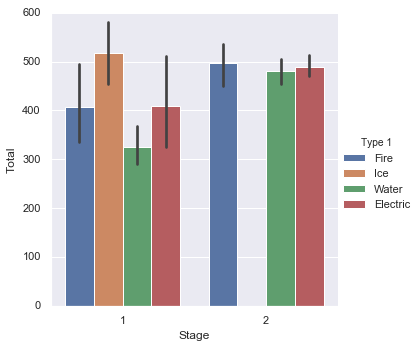

In [126]:
sns.catplot(x="Stage", y="Total", hue="Type 1", kind="bar", data=type1_stage);

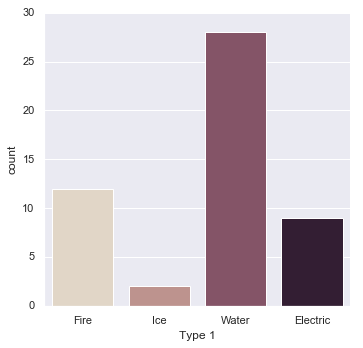

In [127]:
sns.catplot(x="Type 1", kind="count", palette="ch:.25", data=type1);

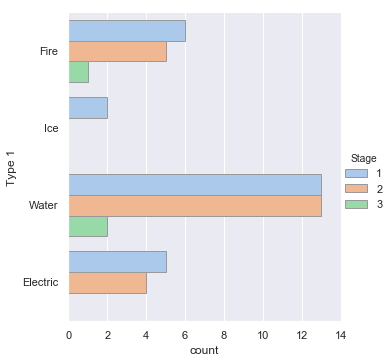

In [128]:
sns.catplot(y="Type 1", hue="Stage", kind="count",
            palette="pastel", edgecolor=".6",
            data=type1);

# Point plots

In [129]:
type1_cat = type1.loc[type1['Type 1'].isin(['Fire','Water'])]

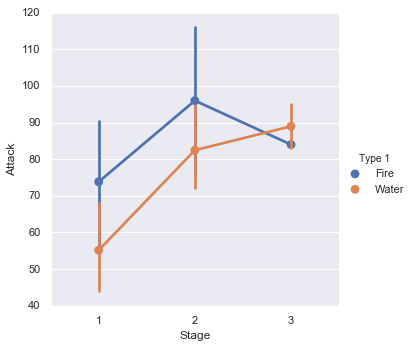

In [130]:
sns.catplot(x="Stage", y="Attack", hue="Type 1", kind="point", data=type1_cat);

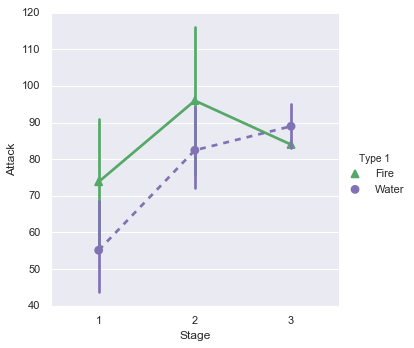

In [131]:
sns.catplot(x="Stage", y="Attack", hue="Type 1",
            palette={"Fire": "g", "Water": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=type1_cat);

# Multiple relationships

In [132]:
type1_v2 = df.loc[df['Type 1'].isin(['Electric','Fire','Ice','Water','Ground'])]

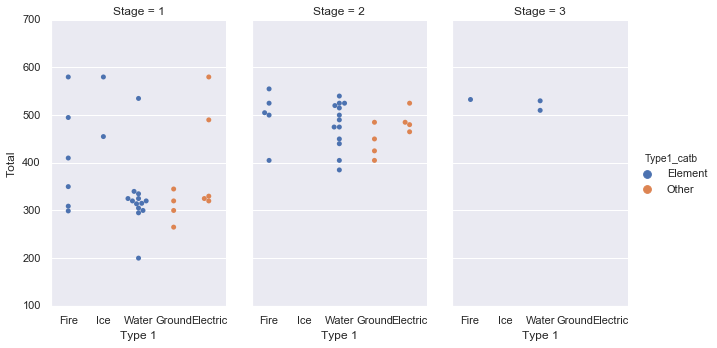

In [133]:
sns.catplot(x="Type 1", y="Total", hue="Type1_catb",
            col="Stage", aspect=.6,
            kind="swarm", data=type1_v2);

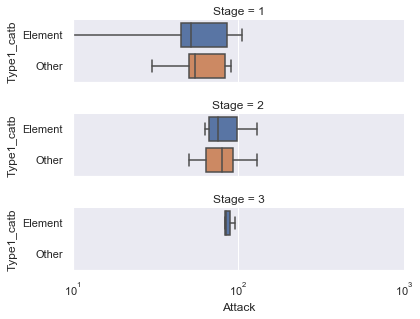

In [134]:
g = sns.catplot(x="Attack", y="Type1_catb", row="Stage",
                kind="box", orient="h", height=1.5, aspect=4,data=type1_v2)
g.set(xscale="log");

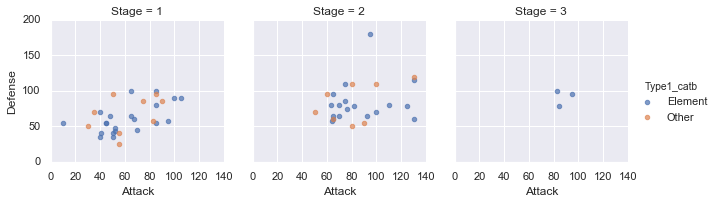

In [135]:
#FacetGride - visualize higher-dimensional relationships
g = sns.FacetGrid(type1_v2, col="Stage", hue="Type1_catb")
g.map(plt.scatter, "Attack", "Defense", alpha=.7)
g.add_legend();

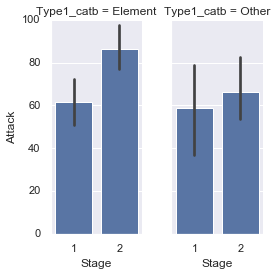

In [136]:
g = sns.FacetGrid(type1, col="Type1_catb", height=4, aspect=.5)
g.map(sns.barplot, "Stage", "Attack");

# Categorical Scatterplots

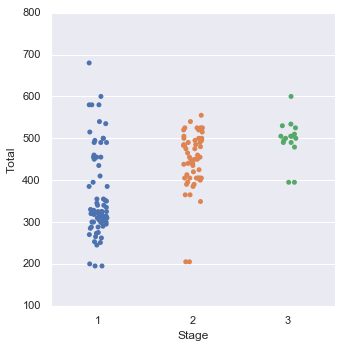

In [137]:
sns.catplot(x="Stage", y="Total", data=df);

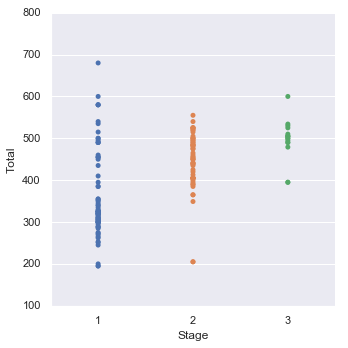

In [138]:
#jitter controls the magnitude of jitter or disables it
sns.catplot(x="Stage", y="Total", jitter=False, data=df);

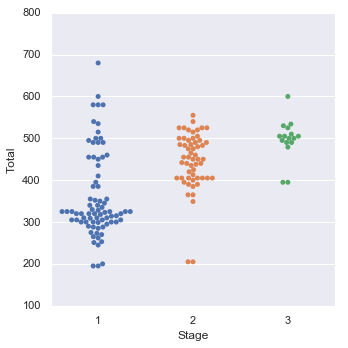

In [139]:
#beeswarm plot - prevent points from overlapping
sns.catplot(x="Stage", y="Total", kind="swarm", data=df);

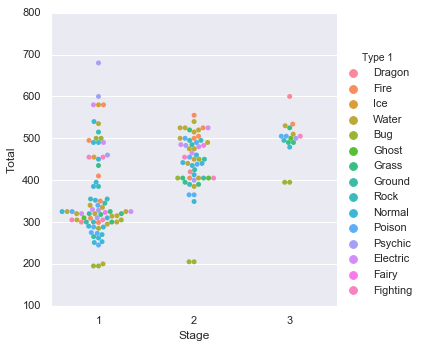

In [140]:
#adding a hue semantic
sns.catplot(x="Stage", y="Total", hue="Type 1", kind="swarm", data=df);

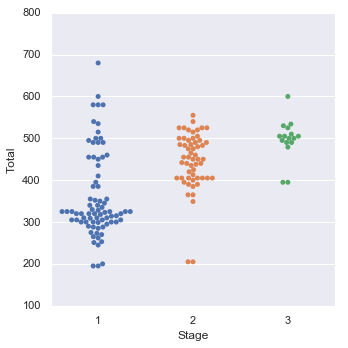

In [141]:
sns.catplot(x="Stage", y="Total", kind="swarm", data=df);

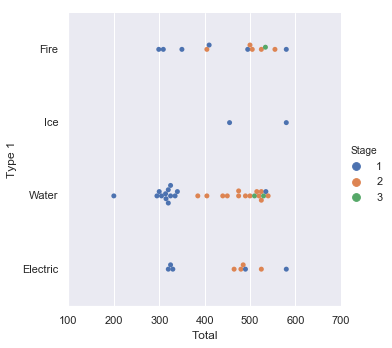

In [142]:
# categorical variable on the y axis
sns.catplot(x="Total", y="Type 1", hue="Stage", kind="swarm", data=type1);

# Boxplots

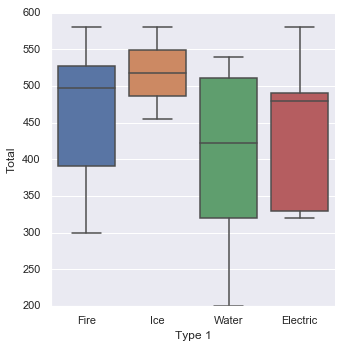

In [143]:
sns.catplot(x="Type 1", y="Total", kind="box", data=type1);

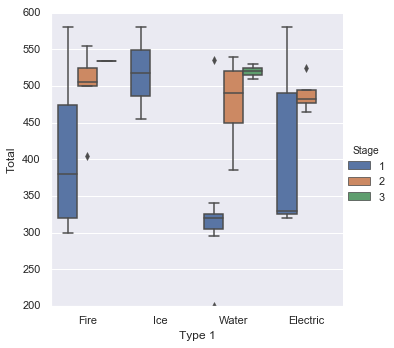

In [144]:
sns.catplot(x="Type 1", y="Total", hue="Stage", kind="box", data=type1);

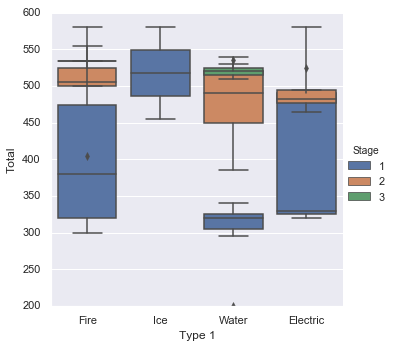

In [145]:
sns.catplot(x="Type 1", y="Total", hue="Stage", kind="box", dodge=False, data=type1);

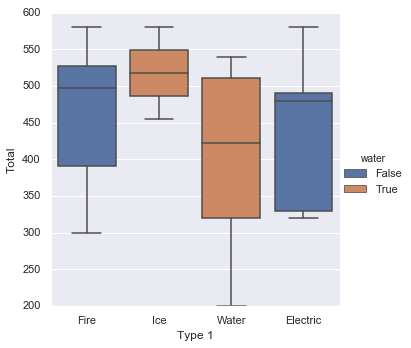

In [146]:
type1["water"] = type1["Type 1"].isin(["Water","Ice"])
sns.catplot(x="Type 1", y="Total", hue="water", kind="box", dodge=False, data=type1);

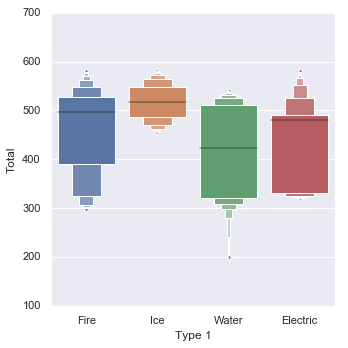

In [147]:
sns.catplot(x="Type 1", y="Total", kind="boxen", data=type1);

# Violinplots (boxplot w KDE)

In [148]:
type1_stage = type1.loc[type1['Stage'].isin(['1','2'])]

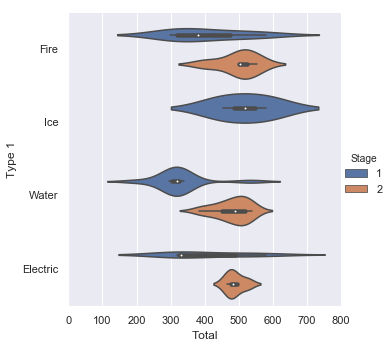

In [149]:
sns.catplot(x="Total", y="Type 1", hue="Stage",
            kind="violin", data=type1_stage);

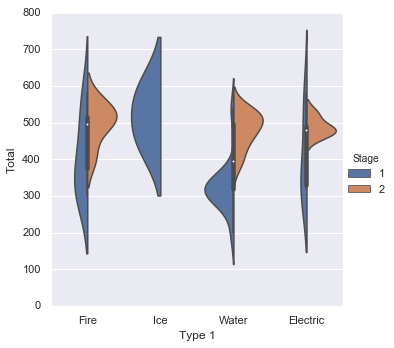

In [150]:
sns.catplot(x="Type 1", y="Total", hue="Stage",
            kind="violin", split=True, data=type1_stage);

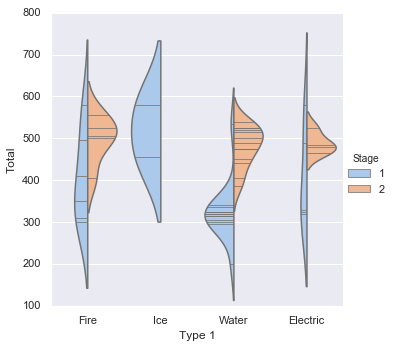

In [151]:
# show each individual observation
sns.catplot(x="Type 1", y="Total", hue="Stage",
            kind="violin", inner="stick", split=True, palette="pastel",data=type1_stage);

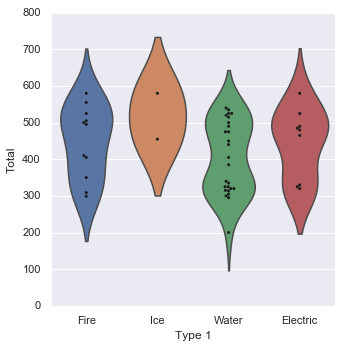

In [152]:
# Combining swarmplot with violin plot
g = sns.catplot(x="Type 1", y="Total", kind="violin", inner=None, data=type1_stage)
sns.swarmplot(x="Type 1", y="Total", color="k", size=3, data=type1_stage, ax=g.ax);

# KDE

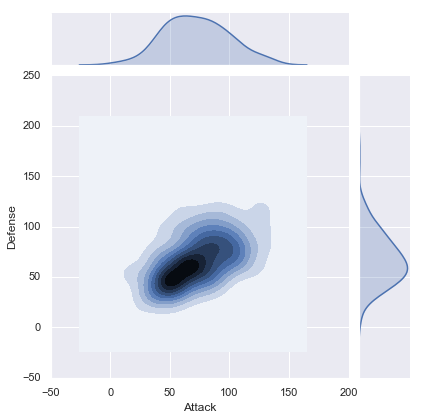

In [153]:
sns.jointplot(x="Attack", y="Defense", data=df, kind="kde");

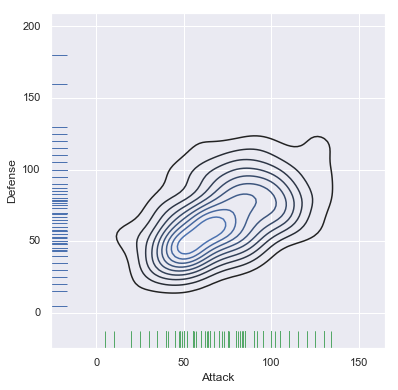

In [155]:
# two-dimensional KDE
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.Attack, df.Defense, ax=ax)
sns.rugplot(df.Attack, color="g", ax=ax)
sns.rugplot(df.Defense, vertical=True, ax=ax);

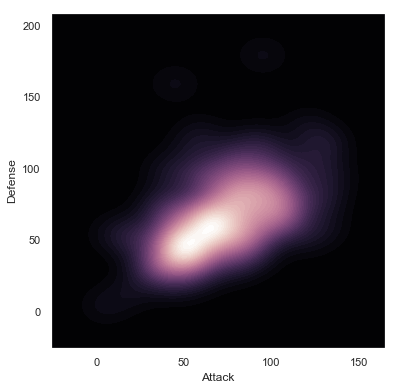

In [156]:
# Increase # of contour levels
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.Attack, df.Defense, cmap=cmap, n_levels=60, shade=True);

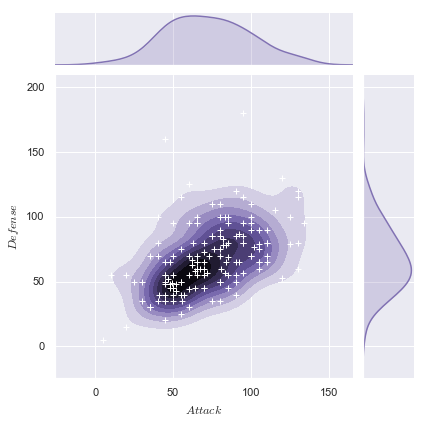

In [157]:
g = sns.jointplot(x="Attack", y="Defense", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Attack$", "$Defense$");

# Pairwise relationships

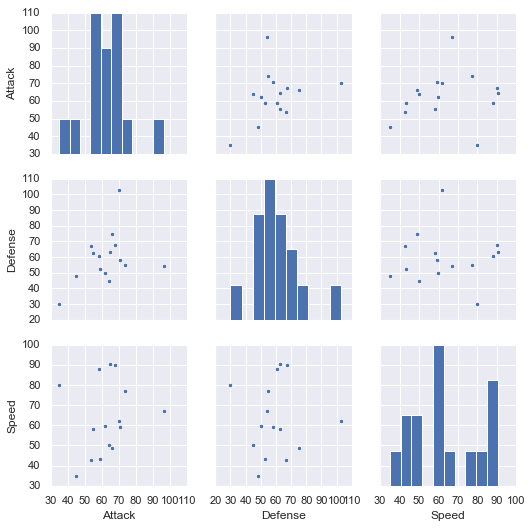

In [158]:
type1b = type1_overall.drop(['Stage','Total','HP','Sp. Def','Sp. Atk'], axis=1)
sns.pairplot(type1b);

# Histograms

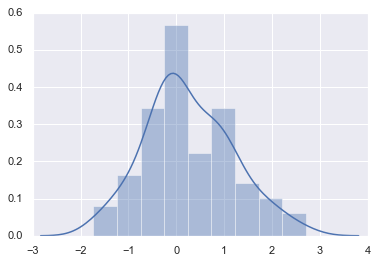

In [159]:
Attack = np.random.normal(size=100)
sns.distplot(Attack);

# Scatterplots

In [160]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["Attack", "Defense"])

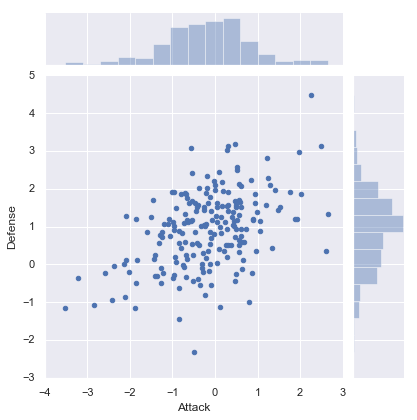

In [161]:
sns.jointplot(x="Attack", y="Defense", data=df);

# Hexbin Plots

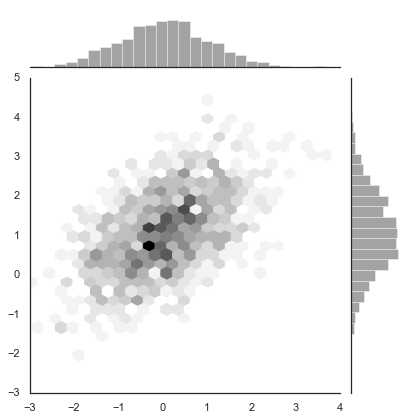

In [162]:
Attack, Defense = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=Attack, y=Defense, kind="hex", color="k");